In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corrtype = '2pt'
xlim = [1.7,5.3]
xticks = [2,3,4,5]
#corrtype = 'd2pt'
#xlim = [1.7,6.3]
#xticks = [2,3,4,5,6]
#corrtype = 'gV8'
#corrtype = 'dgV8'
#xlim = [0.7,4.3]
#xticks = [1,2,3,4]
#corrtype = 'gV10'
#corrtype = 'dgV10'
#xlim = [0.7,5.3]
#xticks = [1,2,3,4,5]
filename = './data/3296_stability_%s.csv' %corrtype
data = open(filename,'r')
df = pd.read_csv(filename,index_col=0).T
df

1state_t,1state_Q,1state_dZ0_q0_mean,1state_dZ0_q0_sdev,1state_dgV_q0_mean,1state_dgV_q0_sdev,1state_dZ0_q1_mean,1state_dZ0_q1_sdev,1state_dgV_q1_mean,1state_dgV_q1_sdev,2state_t,...,4state_t,4state_Q,4state_dZ0_q0_mean,4state_dZ0_q0_sdev,4state_dgV_q0_mean,4state_dgV_q0_sdev,4state_dZ0_q1_mean,4state_dZ0_q1_sdev,4state_dgV_q1_mean,4state_dgV_q1_sdev
2,5.736778e-24,-1.581802,0.020362,-3.013114,0.366908,-1.577085,0.019289,-3.496674,0.341980,2.0,...,2.0,0.985264,-1.448971,0.074050,-4.750078,0.511091,-1.501007,0.088035,-4.272492,0.390231
3,1.558288e-23,-1.566920,0.029059,-2.921168,0.378792,-1.562954,0.028729,-3.463903,0.351350,3.0,...,3.0,0.982790,-1.487681,0.091914,-4.469645,0.551149,-1.530695,0.111812,-4.004346,0.364873
4,3.960577e-24,-1.579747,0.036200,-2.948223,0.384774,-1.576444,0.035685,-3.473030,0.356838,4.0,...,4.0,0.986410,-1.458703,0.085341,-4.584129,0.462853,-1.519613,0.140602,-4.049718,0.396058
5,2.010008e-24,-1.643364,0.057809,-2.975633,0.383412,-1.638526,0.057385,-3.458933,0.356003,5.0,...,5.0,0.969149,-1.454066,0.063912,-4.586707,0.274670,-1.473421,0.070223,-4.180930,0.280414


In [3]:
# plot params
figsize = (3.50394*2,2*2.1655535534)
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1
plt_axes = [0.14,0.155,0.825,0.825]
# state and q label
pparam = dict()
# state
pparam['color'] = dict()
pparam['color']['1state'] = '#ec5d57' # red
pparam['color']['2state'] = '#70bf41' # green
pparam['color']['3state'] = '#51a7f9' # blue
pparam['color']['4state'] = '#b36ae2' # purple
# q
pparam['shape'] = dict()
pparam['shape']['q0'] = 'o'
pparam['shape']['q1'] = 's'
# label translator
pparam['label'] = dict()
pparam['label']['2pt'] = 'C_{\mathrm{2pt}}(t)'
pparam['label']['d2pt'] = 'C^\prime_{\mathrm{2pt}}(t)'
pparam['label']['gV8'] = 'C_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['dgV8'] = 'C^\prime_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['gV10'] = 'C_{\mathrm{3pt}}(10,t^\prime)'
pparam['label']['dgV10'] = 'C^\prime_{\mathrm{3pt}}(10,t^\prime)'

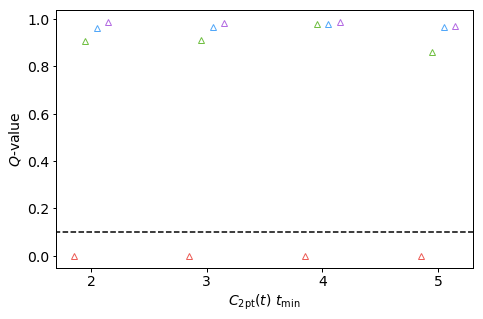

In [4]:
fig = plt.figure('Q-value stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    xshifted = x + 0.1*(nstate-2.5)
    y = df['%sstate_Q' %nstate]
    ax.errorbar(xshifted,y=y,marker='^',color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
ax.errorbar(x=[0,10],y=[0.1,0.1],color='k',ls='--')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$Q$-value', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_Q.pdf' %corrtype, transparent=True)

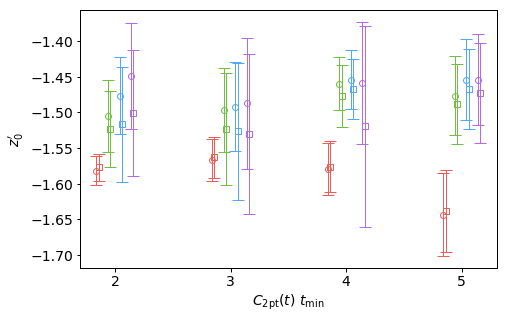

In [5]:
fig = plt.figure('dZ0 stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2.5)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dZ0_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dZ0_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$z_0^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dZ0.pdf' %corrtype, transparent=True)

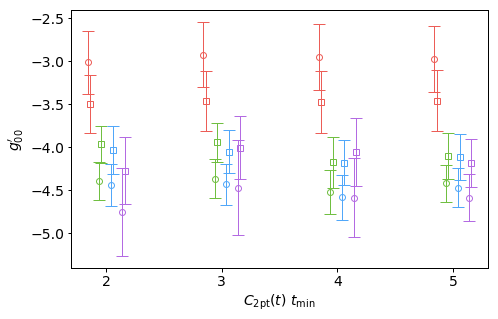

In [6]:
fig = plt.figure('dgV stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2.5)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dgV_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dgV_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$g_{00}^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dgV.pdf' %corrtype, transparent=True)